## Homework: 03
>The task aims to assess the importance of each feature in a classification model by eliminating them one at a time and observing changes in accuracy. This helps identify which features significantly impact the model's performance and which may be less essential, guiding us in selecting the most valuable features for predictions.

> Note: sometimes your answer doesn't match one of  
> the options exactly. That's fine.  
> Select the option that's closest to your solution.

### Dataset

In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

Or you can do it with `wget`:

```bash
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
```

We need to take `bank/bank-full.csv` file from the downloaded zip-file.  
In this dataset our desired target for classification task will be `y` variable - has the client subscribed a term deposit or not. 

### Features

For the rest of the homework, you'll need to use only these columns:

* `age`,
* `job`,
* `marital`,
* `education`,
* `balance`,
* `housing`,
* `contact`,
* `day`,
* `month`,
* `duration`,
* `campaign`,
* `pdays`,
* `previous`,
* `poutcome`,
* `y`

### Data preparation

* Select only the features from above.
* Check if the missing values are presented in the features.

In [179]:
# Import required modules.
import numpy as np
import pandas as pd
import seaborn as sns
#from zipfile import ZipFile
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score
%matplotlib inline

In [180]:
# Load the dataset
data = pd.read_csv("C:/Users/PC-023/Documents/bank/bank-full.csv", sep=';')


In [181]:
# Show the head of df_in.
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [182]:
# Show the shape of data.
data.shape

(45211, 17)

In [183]:
# Subset the dataset.
columns_use = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 
             'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

data = data[columns_use]

In [184]:
# Show the head of data.
data.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [185]:
# Show the new head of data.
data.shape

(45211, 15)

In [186]:
# Show the info of data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [187]:
# Check for missing values in data.
data.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Question 1

What is the most frequent observation (mode) for the column `education`?

- `unknown`
- `primary`
- `secondary`
- `tertiary`

In [188]:
# Find the mode for column 'education'.
data['education'].mode()

0    secondary
Name: education, dtype: object

Question 1 Answer= secondary

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `age` and `balance`
- `day` and `campaign`
- `day` and `pdays`
- `pdays` and `previous`

In [189]:
# Select numerical data in data.
data_numerical = data.copy().select_dtypes(include='number')

In [190]:
# Show the statistics of data_numerical.
data_numerical.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [191]:
# Show the correletions between all the columns.
data_numerical.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


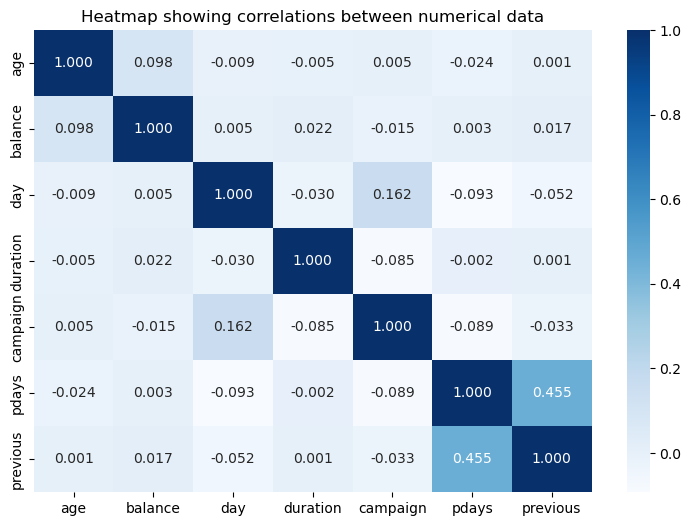

In [192]:
# Draw the heatmap of the correlations.
plt.figure(figsize=(9, 6))
sns.heatmap(data_numerical.corr(), cmap="Blues", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between numerical data')
plt.show();

* The heatmap mostly shows weak relationships between features, with a few exceptions.
* Only "previous" and "pdays" show a moderate positive relationship (0.455), while most other features don’t have strong connections.

In [193]:
# Unstack the correlation values.
df_unstack = data_numerical.corr().unstack().sort_values(ascending = False)
df_unstack

age       age         1.000000
balance   balance     1.000000
pdays     pdays       1.000000
campaign  campaign    1.000000
day       day         1.000000
duration  duration    1.000000
previous  previous    1.000000
          pdays       0.454820
pdays     previous    0.454820
campaign  day         0.162490
day       campaign    0.162490
age       balance     0.097783
balance   age         0.097783
          duration    0.021560
duration  balance     0.021560
balance   previous    0.016674
previous  balance     0.016674
age       campaign    0.004760
campaign  age         0.004760
balance   day         0.004503
day       balance     0.004503
balance   pdays       0.003435
pdays     balance     0.003435
previous  age         0.001288
age       previous    0.001288
duration  previous    0.001203
previous  duration    0.001203
pdays     duration   -0.001565
duration  pdays      -0.001565
age       duration   -0.004648
duration  age        -0.004648
age       day        -0.009120
day     

Question 2 Answer= pdays and previous

### Target encoding

* Now we want to encode the `y` variable.
* Let's replace the values `yes`/`no` with `1`/`0`.

In [194]:
# Replace the values `yes`/`no` with `1`/`0` in column y.
df = data.copy()
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [195]:
# Show the head of df1.
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0


### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.

In [196]:
# Split df1 into train/val/test sets with 60%/20%/20% distribution.
SEED = 42

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(df) == (len(df_train) + len(df_val) + len(df_test))

In [197]:
# Reset_index for y_train, y_val and y_test.
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [198]:
# Define y_train, y_val and y_test.
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [199]:
# Drop y from y_train, y_val and y_test.
df_train = df_train.drop('y', axis=1)
df_val = df_val.drop('y', axis=1)
df_test = df_test.drop('y', axis=1)

assert 'y' not in df_train.columns
assert 'y' not in df_val.columns
assert 'y' not in df_test.columns

### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `contact`
- `education`
- `housing`
- `poutcome`

In [200]:
# Define cal_mi function.
def cal_mi(series):
    return mutual_info_score(series, y_train)

In [201]:
# List the categorical columns.
df_cat = data.copy().select_dtypes(exclude='number').columns
df_cat

Index(['job', 'marital', 'education', 'housing', 'contact', 'month',
       'poutcome', 'y'],
      dtype='object')

In [202]:
# List the categorical columns.
cat_list = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [203]:
# Calculate MI (Mutual Information).
df_mi = df_train[cat_list].apply(cal_mi).round(2)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
month,0.03
poutcome,0.03
job,0.01
housing,0.01
contact,0.01
marital,0.00
education,0.00


Question 3 Answer= poutcome

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.6
- 0.7
- 0.8
- 0.9

In [204]:
# Derive X_train.
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [205]:
# Fit X_train and y_train to model.
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [206]:
# Derive X_val.
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [207]:
# Obtain y_pred.
y_pred = model.predict(X_val)

In [208]:
# Calculate accuracy.
accuracy = np.round(accuracy_score(y_val, y_pred), 2)
print(f'Accuracy = {accuracy}')

Accuracy = 0.9


Question 4 Answer= 0.9

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `age`
- `balance`
- `marital`
- `previous`

> **Note**: The difference doesn't have to be positive.

In [209]:
# List the features.
features = df_train.columns.to_list()
features

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [210]:
# Apply the feature elimination technique.
original_score = accuracy
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in features:
    subset = features.copy()
    subset.remove(feature)
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    scores.loc[len(scores)] = [feature, score, original_score - score]

In [211]:
# Print the scores.
scores['difference'] = [abs(x) for x in scores['difference']]
scores

,eliminated_feature,accuracy,difference
0,age,0.900243,0.000243
1,job,0.901128,0.001128
2,marital,0.901239,0.001239
3,education,0.901017,0.001017
4,balance,0.900686,0.000686
5,housing,0.901017,0.001017
6,contact,0.900354,0.000354
7,day,0.900133,0.000133
8,month,0.899912,0.000088
9,duration,0.890179,0.009821


In [212]:
# Select the answer data.
ans_list = ['age', 'balance', 'marital', 'previous']
diff_val = [0.000243,0.000686, 0.001239, 0.001349]

In [213]:
# Find the least useful feature.
min_diff = min(diff_val)
min_diff

0.000243

Question 5 Answer= 'age'

### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.

In [214]:
# Split df1 into train/val/test sets with 60%/20%/20% distribution.
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(df) == (len(df_train) + len(df_val) + len(df_test))

In [215]:
# Reset_index for y_train, y_val and y_test.
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [216]:
# Define y_train, y_val and y_test.
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [217]:
# Drop y from y_train, y_val and y_test.
df_train = df_train.drop('y', axis=1)
df_val = df_val.drop('y', axis=1)
df_test = df_test.drop('y', axis=1)

assert 'y' not in df_train.columns
assert 'y' not in df_val.columns
assert 'y' not in df_test.columns

In [218]:
# Check the shapes of y_train and y_val.
y_train.shape, y_val.shape

((27126,), (9042,))

In [219]:
# Derive X_train.
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [220]:
# Derive X_val.
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [221]:
# Train and output results.
scores = {}
for alpha in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(solver='liblinear', C=alpha, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = accuracy_score(y_val, y_pred)
    scores[alpha] = round(score, 3)
    print(f'alpha = {alpha}:\t RMSE = {score}')

alpha = 0.01:	 RMSE = 0.8980314089803141
alpha = 0.1:	 RMSE = 0.9013492590134926
alpha = 1:	 RMSE = 0.9015704490157045
alpha = 10:	 RMSE = 0.9009068790090687
alpha = 100:	 RMSE = 0.9011280690112807


In [222]:
# Show the scores dictionary.
scores

{0.01: 0.898, 0.1: 0.901, 1: 0.902, 10: 0.901, 100: 0.901}

In [223]:
# Print the smallest alpha with best accuracy.
print(f'The smallest `alpha` with the best accuracy is {max(scores, key=scores.get)}.')

The smallest `alpha` with the best accuracy is 1.


### Discussion:
>The table shows the effect on model accuracy when each feature is removed. The “difference” column indicates the change in accuracy caused by removing each feature. A small difference (like with "age") means the feature has little impact on accuracy, so the model performs similarly without it. A larger difference (like with "poutcome") suggests the feature is important, as its removal leads to a noticeable accuracy drop.